# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

In [16]:
import numpy as np
import pandas as pd
from plotnine import *
from IPython.display import display

In [17]:
DF = pd.read_csv("asteroidTrain.csv")
DF.info()

C:\Users\matia\AppData\Local\Temp\ipykernel_15912\3696243933.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       100000 non-null  object 
 1   a               100000 non-null  float64
 2   e               100000 non-null  float64
 3   G               80 non-null      float64
 4   i               100000 non-null  float64
 5   om              100000 non-null  float64
 6   w               100000 non-null  float64
 7   q               100000 non-null  float64
 8   ad              100000 non-null  float64
 9   per_y           100000 non-null  float64
 10  data_arc        99907 non-null   float64
 11  condition_code  100000 non-null  float64
 12  n_obs_used      100000 non-null  int64  
 13  H               99459 non-null   float64
 14  diameter        100000 non-null  object 
 15  extent          10 non-null      object 
 16  albedo          99122 non-null   float64
 17  rot_per    

# Limpieza de Datos

In [18]:
# Todo: Justificar la eliminación de las variables con nulos
df=DF.dropna(axis=1)
df

,full_name,a,e,i,om,w,q,ad,per_y,condition_code,n_obs_used,diameter,neo,pha,moid
0,97632 (2000 EL145),3.069866,0.184417,3.620920,308.458533,249.570070,2.503729,3.636003,5.378824,0.0,614,6.611,N,N,1.50522
1,49808 (1999 XD40),2.386539,0.104566,13.003513,105.866881,329.104052,2.136988,2.636089,3.686897,0.0,1247,4.255,N,N,1.16197
2,390390 (2013 WC84),3.018175,0.084529,14.247933,245.449168,115.242451,2.763053,3.273297,5.243544,0.0,181,5.625,N,N,1.79743
3,14319 (1978 US5),2.793049,0.290215,16.677722,17.862425,287.769691,1.982465,3.603633,4.667948,0.0,955,4.224,N,N,1.04034
4,321079 (2008 SW97),2.721394,0.098602,1.975506,271.706257,248.448520,2.453059,2.989728,4.489472,0.0,251,3.525,N,N,1.46299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,376501 (2012 KN42),3.161511,0.166092,28.442710,224.796987,2.422644,2.636410,3.686612,5.621475,0.0,112,5.946,N,N,1.62746
99996,322401 (2011 QC97),2.715932,0.239266,16.789523,34.531718,44.097353,2.066102,3.365761,4.475963,0.0,201,4.724,N,N,1.11044
99997,410630 (2008 RD19),3.188786,0.278970,15.177104,188.342499,255.934423,2.299209,4.078363,5.694376,0.0,141,4.148,N,N,1.36906
99998,81593 (2000 HC52),2.754535,0.106028,8.758664,230.483443,34.567890,2.462477,3.046593,4.571730,0.0,835,2.749,N,N,1.45246


# Selección de Variables

Dado que estas columnas permiten la comprensión detallada de los asteroides en relación al planeta tierra, son las que consideramos que mejor permiten analizar y predecir los diametros de los asteroides.

1. __a:__ semi-major axis(au) = diámetro más largo

2. __e:__ eccentricity = un parámetro que cuantifica la manera en que su órbita alrededor de otro cuerpo se desvía de una circunferencia perfecta

3. __i:__ Inclination with respect to x-y ecliptic plane(deg) = es el ángulo que forma el plano de la órbita (plano orbital) de un astro con respecto a un plano de referencia

4. __om:__ Longitude of the ascending node = especificar la órbita de un objeto en el espacio

5. __w:__ argument of perihelionl ángulo que va desde el nodo ascendente hasta el periastro, medido en el plano

6. __q:__ perihelion distance(au) = El punto de menor distancia  de una órbita elíptica a su centro de atracción

7. __ad:__ aphelion distance(au) =  el punto de mayor distancia de una órbita elíptica a su centro de atracción

8. __per_y:__ Orbital period = tiempo que le toma a un astro recorrer su órbita.

9. __n_obs_used:__ number of observations used = observasiones realizadas

10. __moid:__ Earth Minimum orbit Intersection Distance(au) = distancia en que sera interceptado por la orbita terrestre

In [19]:
df = df.drop(columns=['neo', 'pha', 'full_name', 'condition_code'])

In [20]:
df.to_csv('asteroidEXP.csv')

In [9]:
target = df['diameter'].to_frame()
df = df.drop("diameter", axis=1)

In [10]:
target = target.astype(float)

# Variables Finales

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           100000 non-null  float64
 1   e           100000 non-null  float64
 2   i           100000 non-null  float64
 3   om          100000 non-null  float64
 4   w           100000 non-null  float64
 5   q           100000 non-null  float64
 6   ad          100000 non-null  float64
 7   per_y       100000 non-null  float64
 8   n_obs_used  100000 non-null  int64  
 9   moid        100000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


In [12]:
display(target)
display(df)

,diameter
0,6.611
1,4.255
2,5.625
3,4.224
4,3.525
...,...
99995,5.946
99996,4.724
99997,4.148
99998,2.749


,a,e,i,om,w,q,ad,per_y,n_obs_used,moid
0,3.069866,0.184417,3.620920,308.458533,249.570070,2.503729,3.636003,5.378824,614,1.50522
1,2.386539,0.104566,13.003513,105.866881,329.104052,2.136988,2.636089,3.686897,1247,1.16197
2,3.018175,0.084529,14.247933,245.449168,115.242451,2.763053,3.273297,5.243544,181,1.79743
3,2.793049,0.290215,16.677722,17.862425,287.769691,1.982465,3.603633,4.667948,955,1.04034
4,2.721394,0.098602,1.975506,271.706257,248.448520,2.453059,2.989728,4.489472,251,1.46299
...,...,...,...,...,...,...,...,...,...,...
99995,3.161511,0.166092,28.442710,224.796987,2.422644,2.636410,3.686612,5.621475,112,1.62746
99996,2.715932,0.239266,16.789523,34.531718,44.097353,2.066102,3.365761,4.475963,201,1.11044
99997,3.188786,0.278970,15.177104,188.342499,255.934423,2.299209,4.078363,5.694376,141,1.36906
99998,2.754535,0.106028,8.758664,230.483443,34.567890,2.462477,3.046593,4.571730,835,1.45246


## Busqueda de Hiperparámetros

### Curva de Aprendizaje

In [11]:
numEpocas = 1000
model = MLPRegressor(
    hidden_layer_sizes=(10,10,10,10,10),
    activation="relu", 
    max_iter=numEpocas,
    n_iter_no_change=numEpocas
)
model = model.fit(df,target["diameter"])

/home/parker/Documents/jupyter/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


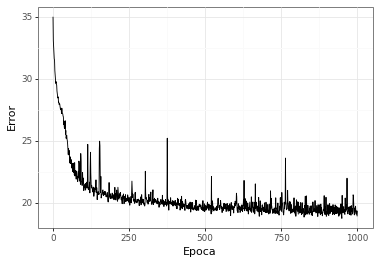

<ggplot: (8786701435148)>

In [12]:
#Curva de aprendizaje hora : 10:45
tempDF=pd.DataFrame(model.loss_curve_,columns=["Error"])
tempDF["Epoca"]=range(1,tempDF.shape[0]+1)
ggplot(tempDF)+aes(x="Epoca",y="Error")+theme_bw()+geom_line()

## Número de Capas y Cantidad de Neuronas por Capa

### 3 Capas

### 4 Capas

#### Hidden Layers Sizes: (10,10,10,10)

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics as mt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

numEpocas=1000

TrainF1Score = []
TestF1Score = []

#Crear un objeto de KFold cross validation
k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)

#Crear arreglos para guardar los errores de cada fold (tanto para entrenamiento como test).
MSETrain = np.zeros(k)
MSETest = np.zeros(k)
index=0
for train_index, test_index in kf.split(df):
    model = MLPRegressor(hidden_layer_sizes=(10,10,10,10),activation="relu", max_iter=numEpocas,n_iter_no_change=numEpocas, batch_size=256)
    model = model.fit(df.iloc[train_index],target["diameter"].iloc[train_index])
    prediccion=model.predict(df.iloc[train_index])
    MSETrain[index]=mean_squared_error(target["diameter"].iloc[train_index],prediccion)
    prediccion=model.predict(df.iloc[test_index])
    MSETest[index]=mean_squared_error(target["diameter"].iloc[test_index],prediccion)
    
    index = index + 1
    print(index)
    
print("Average ACC train error: ",MSETrain.mean(),"+-",MSETrain.std())
print("Average ACC train error: ",MSETest.mean(),"+-",MSETest.std())

C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


1


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


2


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


3


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


4


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


5


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


6


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


7


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


8


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


9
10
Average ACC train error:  38.63511222443602 +- 5.339506579097414
Average ACC train error:  42.61719798585764 +- 24.492362384952333


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


#### Hidden Layers Sizes: (30,30,30,30)

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics as mt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

numEpocas=1000

#Crear un objeto de KFold cross validation
k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)

#Crear arreglos para guardar los errores de cada fold (tanto para entrenamiento como test).
MSETrain = np.zeros(k)
MSETest = np.zeros(k)
index=0
for train_index, test_index in kf.split(df):
    model = MLPRegressor(hidden_layer_sizes=(30,30,30,30),activation="relu", max_iter=numEpocas, n_iter_no_change=numEpocas/2, batch_size=256)
    model = model.fit(df.iloc[train_index],target["diameter"].iloc[train_index])
    prediccion=model.predict(df.iloc[train_index])
    MSETrain[index]=mean_squared_error(target["diameter"].iloc[train_index],prediccion)
    prediccion=model.predict(df.iloc[test_index])
    MSETest[index]=mean_squared_error(target["diameter"].iloc[test_index],prediccion)
    
    index = index + 1
    print(index)
    
print("Average MSE train error: ",MSETrain.mean(),"+-",MSETrain.std())
print("Average MSE train error: ",MSETest.mean(),"+-",MSETest.std())

C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


1


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


2


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


3


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


4


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


5


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


6


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


7


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


8


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


9


C:\Users\matia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


10
Average MSE train error:  38.65884403958572 +- 2.824389497457345
Average MSE train error:  43.62533668061957 +- 26.086680898480328


### 5 Capas

#### Hidden Layers Sizes: (20,20,20,20,20)

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics as mt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

numEpocas=1000

#Crear un objeto de KFold cross validation
k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)

#Crear arreglos para guardar los errores de cada fold (tanto para entrenamiento como test).
MSETrain = np.zeros(k)
MSETest = np.zeros(k)
index=0
for train_index, test_index in kf.split(df):
    model = MLPRegressor(hidden_layer_sizes=(20,20,20,20,20),activation="relu", max_iter=numEpocas, n_iter_no_change=numEpocas/2, batch_size=256)
    model = model.fit(df.iloc[train_index],target["diameter"].iloc[train_index])
    prediccion=model.predict(df.iloc[train_index])
    MSETrain[index]=mean_squared_error(target["diameter"].iloc[train_index],prediccion)
    prediccion=model.predict(df.iloc[test_index])
    MSETest[index]=mean_squared_error(target["diameter"].iloc[test_index],prediccion)
    
    index = index + 1
    print(index)
    
print("Average MSE train error: ",MSETrain.mean(),"+-",MSETrain.std())
print("Average MSE train error: ",MSETest.mean(),"+-",MSETest.std())

c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


1


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


2


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


3
4


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


5


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


6


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


7


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


8


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


9


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


10
Average MSE train error:  36.477173301776574 +- 3.671226138176775
Average MSE train error:  41.960643060611446 +- 25.82002016039933


#### Hidden Layers Sizes: (11,4,4,4,1)

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics as mt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

numEpocas=1000

#Crear un objeto de KFold cross validation
k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)

#Crear arreglos para guardar los errores de cada fold (tanto para entrenamiento como test).
MSETrain = np.zeros(k)
MSETest = np.zeros(k)
index=0
for train_index, test_index in kf.split(df):
    model = MLPRegressor(hidden_layer_sizes=(11,4,4,4,1),activation="relu", max_iter=numEpocas, n_iter_no_change=numEpocas/2, batch_size=256)
    model = model.fit(df.iloc[train_index],target["diameter"].iloc[train_index])
    prediccion=model.predict(df.iloc[train_index])
    MSETrain[index]=mean_squared_error(target["diameter"].iloc[train_index],prediccion)
    prediccion=model.predict(df.iloc[test_index])
    MSETest[index]=mean_squared_error(target["diameter"].iloc[test_index],prediccion)
    
    index = index + 1
    print(index)
    
print("Average MSE train error: ",MSETrain.mean(),"+-",MSETrain.std())
print("Average MSE train error: ",MSETest.mean(),"+-",MSETest.std())

1


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


2


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


3


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


4


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


5


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


6


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


7


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


8


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


9
10
Average MSE train error:  44.43038761315236 +- 10.198936917324106
Average MSE train error:  43.7401703652429 +- 35.44070216395143


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


#### Hidden Layers Sizes: (11,3,3,3,1)

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics as mt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

numEpocas=1000

#Crear un objeto de KFold cross validation
k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)

#Crear arreglos para guardar los errores de cada fold (tanto para entrenamiento como test).
MSETrain = np.zeros(k)
MSETest = np.zeros(k)
index=0
for train_index, test_index in kf.split(df):
    model = MLPRegressor(hidden_layer_sizes=(11,3,3,3,1),activation="relu", max_iter=numEpocas, n_iter_no_change=numEpocas/2, batch_size=256)
    model = model.fit(df.iloc[train_index],target["diameter"].iloc[train_index])
    prediccion=model.predict(df.iloc[train_index])
    MSETrain[index]=mean_squared_error(target["diameter"].iloc[train_index],prediccion)
    prediccion=model.predict(df.iloc[test_index])
    MSETest[index]=mean_squared_error(target["diameter"].iloc[test_index],prediccion)
    
    index = index + 1
    print(index)
    
print("Average MSE train error: ",MSETrain.mean(),"+-",MSETrain.std())
print("Average MSE train error: ",MSETest.mean(),"+-",MSETest.std())

c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


1


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


2
3


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


4


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


5


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


6
7


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


8


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


9
10
Average MSE train error:  53.78777742589433 +- 19.212950407761603
Average MSE train error:  55.169669972927615 +- 26.65684339125957


### 10 Capas

#### Hidden Layers Sizes: (8,10,10,10,10,10,10,10,10,1)

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics as mt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

numEpocas=1000

#Crear un objeto de KFold cross validation
k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)

#Crear arreglos para guardar los errores de cada fold (tanto para entrenamiento como test).
MSETrain = np.zeros(k)
MSETest = np.zeros(k)
index=0
for train_index, test_index in kf.split(df):
    model = MLPRegressor(hidden_layer_sizes=(8,10,10,10,10,10,10,10,10,1),activation="relu", max_iter=numEpocas, n_iter_no_change=numEpocas/2, batch_size=256)
    model = model.fit(df.iloc[train_index],target["diameter"].iloc[train_index])
    prediccion=model.predict(df.iloc[train_index])
    MSETrain[index]=mean_squared_error(target["diameter"].iloc[train_index],prediccion)
    prediccion=model.predict(df.iloc[test_index])
    MSETest[index]=mean_squared_error(target["diameter"].iloc[test_index],prediccion)
    
    index = index + 1
    print(index)
    
print("Average MSE train error: ",MSETrain.mean(),"+-",MSETrain.std())
print("Average MSE train error: ",MSETest.mean(),"+-",MSETest.std())

c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


1


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


2


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


3


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


4


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


5
6


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


7


c:\Users\erick\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


8
9
10
Average MSE train error:  51.16852635288575 +- 21.3811654491866
Average MSE train error:  51.739520019129976 +- 25.373422528688593
